In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
liar_df=pd.read_csv('/content/drive/MyDrive/Semester Final/Pattern Lab/Project/merged_dataset.csv')

In [ ]:
liar_df.head(3)

,id,label,text,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,2635.json,FALSE,say annies list political group support thirdt...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,decline coal start started natural gas took st...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,hillary clinton agrees john mccain voting give...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver


In [ ]:
class_distribution = liar_df['label'].value_counts()
print(class_distribution)

half-true      2627
FALSE          2507
mostly-true    2454
barely-true    2103
TRUE           2053
pants-fire     1047
Name: label, dtype: int64


# Data Cleaning

In [ ]:
liar_df.dtypes

id                    object
label                 object
text                  object
subject               object
speaker               object
job                   object
state                 object
party                 object
barely_true_cts      float64
false_cts            float64
half_true_cts        float64
mostly_true_cts      float64
pants_on_fire_cts    float64
context               object
dtype: object

In [ ]:
liar_df.isnull().sum()

id                   0
label                0
text                 0
subject              0
speaker              0
job                  0
state                0
party                0
barely_true_cts      0
false_cts            0
half_true_cts        0
mostly_true_cts      0
pants_on_fire_cts    0
context              0
dtype: int64

# Data Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Text Cleaning(removing punctuations and convert lowercase)

In [ ]:
liar_df['text'] = liar_df['text'].str.replace('[^\w\s]', '').str.lower()
liar_df['text'].head(2)

<ipython-input-10-6d0b1fa19463>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  liar_df['text'] = liar_df['text'].str.replace('[^\w\s]', '').str.lower()


0    say annies list political group support thirdt...
1    decline coal start started natural gas took st...
Name: text, dtype: object

# Tokenization and Stopword Removal

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
liar_df['text'] = liar_df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization

In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
liar_df['text'] = liar_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# EDA

In [ ]:
import matplotlib.pyplot as plt

# Data Overview
print(liar_df.shape)

(12791, 14)


In [ ]:
liar_df.describe()

,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts
count,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000
mean,11.583939,13.358781,17.184909,16.497081,6.252222
std,18.976553,24.138209,35.844944,36.162501,16.179649
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,15.000000,13.000000,12.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


# Data Distribution

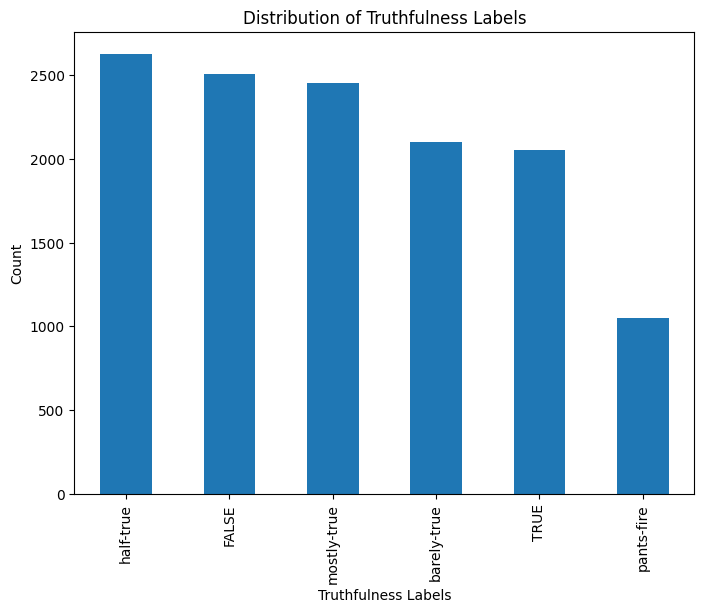

In [ ]:
plt.figure(figsize=(8, 6))
liar_df['label'].value_counts().plot(kind='bar')
plt.xlabel('Truthfulness Labels')
plt.ylabel('Count')
plt.title('Distribution of Truthfulness Labels')
plt.show()

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

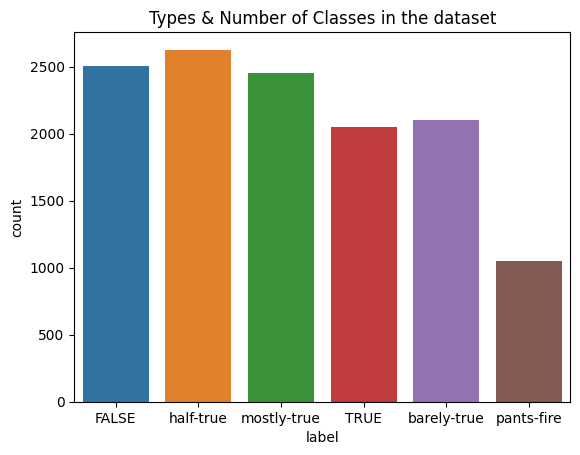

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=liar_df)
plt.title('Types & Number of Classes in the dataset')

# Statement Length Analysis

In [ ]:
liar_df['statement_length'] = liar_df['text'].apply(lambda x: len(x.split()))
max_statement_length = liar_df['statement_length'].max()
max_length_statements = liar_df[liar_df['statement_length'] == max_statement_length]['text']

pd.set_option('display.max_colwidth', None)


print("Maximum Statement Length:", max_statement_length)
print("Statement(s) with the maximum length:")
print(max_length_statements)

Maximum Statement Length: 47
Statement(s) with the maximum length:
9962    barbara buono number trenton politician voted raise tax 154 time property tax 70 percent backed 16 percent sale tax increase utility nursing home cell phone parking lot lottery win gym taxed architect corzines budget drove new jersey 2 billion debt barbara buono number taking new jersey backwards
Name: text, dtype: object


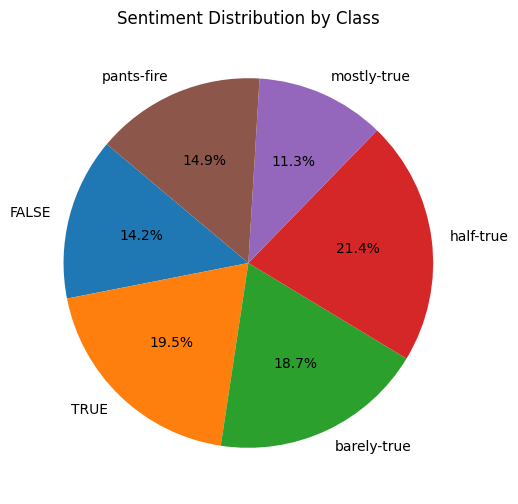

In [ ]:
from textblob import TextBlob

liar_df['sentiment'] = liar_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_by_label = liar_df.groupby('label')['sentiment'].mean()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_by_label, labels=sentiment_by_label.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution by Class')
plt.show()

# Word Frequency Analysis (using word cloud)

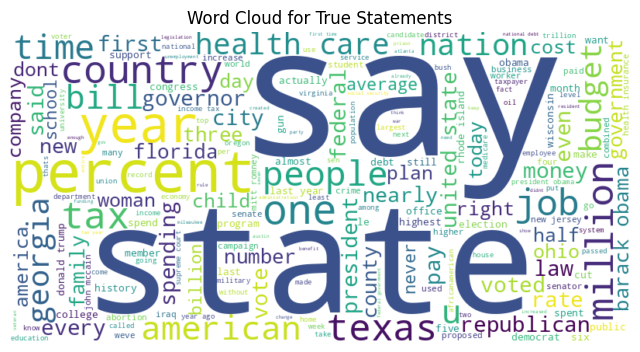

In [ ]:
from wordcloud import WordCloud
np.random.seed(0)
plt.figure(figsize=(8, 6))
true_statements = ' '.join(liar_df[liar_df['label'] == 'TRUE']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_statements)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True Statements')
plt.axis('off')
plt.show()

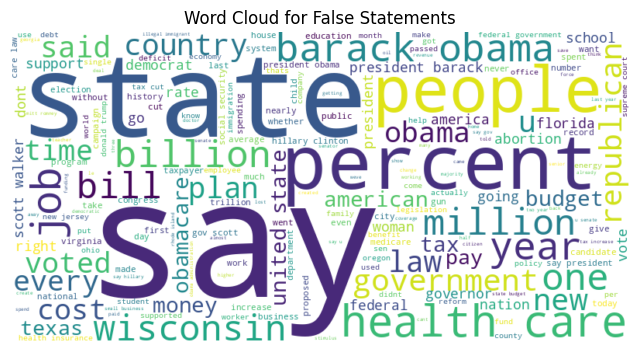

In [ ]:
np.random.seed(0)
plt.figure(figsize=(8, 6))
true_statements = ' '.join(liar_df[liar_df['label'] == 'FALSE']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_statements)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for False Statements')
plt.axis('off')
plt.show()

# Remove unnecessary columns

In [ ]:
liar_df.drop(["id", "subject", "speaker", "job", "state", "party", "barely_true_cts","false_cts","half_true_cts","mostly_true_cts","pants_on_fire_cts","context","statement_length"], axis=1, inplace=True)

In [ ]:
liar_df.head(2)

,label,text,sentiment
0,FALSE,say annies list political group support thirdtrimester abortion demand,0.0
1,half-true,decline coal start started natural gas took started begin president george w bush administration,0.1


# Label Encoding(Map label categories to numerical values)

In [ ]:
label_mapping = {'TRUE': 0, 'FALSE': 1, 'half-true': 2, 'mostly-true': 3, 'barely-true': 4, 'pants-fire': 5}
liar_df['label'] = liar_df['label'].map(label_mapping)
liar_df.head(2)

,label,text,sentiment
0,1,say annies list political group support thirdtrimester abortion demand,0.0
1,2,decline coal start started natural gas took started begin president george w bush administration,0.1


# Select the Statement and Label columns for classification

In [ ]:
X = liar_df["text"]
y = liar_df["label"]

# Spliting train and test data from independent and dependent data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling and RandomUnderSampler for undersampling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_train)

oversampler = SMOTE(random_state=0)
undersampler = RandomUnderSampler(random_state=0)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_vec, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

y_train_resampled.value_counts()

0    2063
1    2063
2    2063
3    2063
4    2063
5    2063
Name: label, dtype: int64

In [ ]:
vocabulary_size = len(vectorizer.get_feature_names_out())

print(f"Vocabulary Size: {vocabulary_size}")

Vocabulary Size: 11629


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)

X_test_transformed = vectorizer.transform(X_test)
y_pred = lr.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)*100

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Logistic Regression Accuracy: 23.06
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.24      0.23       387
           1       0.21      0.21      0.21       487
           2       0.28      0.22      0.25       564
           3       0.27      0.26      0.26       487
           4       0.20      0.19      0.19       439
           5       0.20      0.31      0.24       195

    accuracy                           0.23      2559
   macro avg       0.23      0.24      0.23      2559
weighted avg       0.23      0.23      0.23      2559

Logistic Regression Confusion Matrix:
 [[ 93  58  69  84  47  36]
 [ 73 103  62  69  95  85]
 [ 82 103 126 109  98  46]
 [ 96  76  94 125  68  28]
 [ 62  99  81  62  83  52]
 [ 18  46  19  18  34  60]]


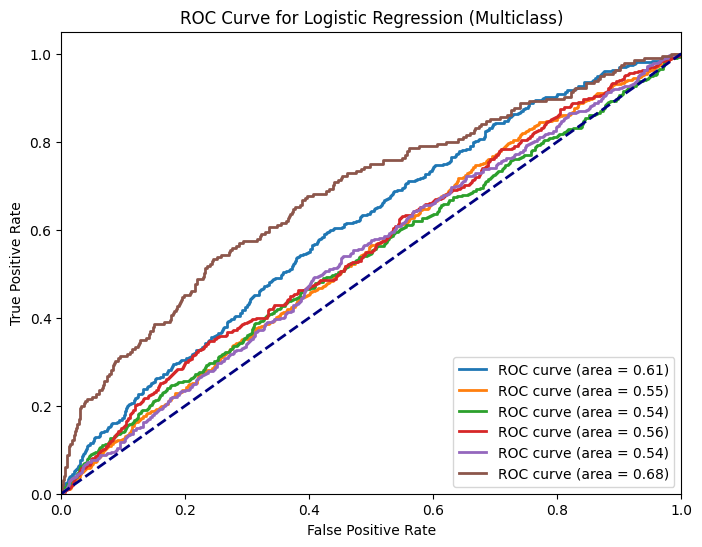

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob_lr = lr.predict_proba(X_test_transformed)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(label_mapping)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (Multiclass)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)

X_test_transformed = vectorizer.transform(X_test)
y_pred_svm = svm.predict(X_test_transformed)
accuracy_svm = accuracy_score(y_test, y_pred_svm)*100

print(f"SVM Accuracy: {accuracy_svm:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 25.05
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.25      0.24       387
           1       0.26      0.25      0.25       487
           2       0.27      0.34      0.30       564
           3       0.25      0.23      0.24       487
           4       0.25      0.19      0.22       439
           5       0.20      0.19      0.19       195

    accuracy                           0.25      2559
   macro avg       0.24      0.24      0.24      2559
weighted avg       0.25      0.25      0.25      2559

SVM Confusion Matrix:
 [[ 97  54  94  89  33  20]
 [ 66 121 107  68  68  57]
 [ 77  82 189 118  73  25]
 [102  72 141 113  45  14]
 [ 64  85 125  49  84  32]
 [ 15  55  42  16  30  37]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled, y_train_resampled)

X_test_transformed = vectorizer.transform(X_test)
y_pred_dt = decision_tree.predict(X_test_transformed)
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 21.06
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.24      0.21       387
           1       0.25      0.21      0.23       487
           2       0.26      0.17      0.21       564
           3       0.22      0.21      0.22       487
           4       0.20      0.20      0.20       439
           5       0.14      0.31      0.20       195

    accuracy                           0.21      2559
   macro avg       0.21      0.22      0.21      2559
weighted avg       0.22      0.21      0.21      2559

Decision Tree Confusion Matrix:
 [[ 92  54  49  96  45  51]
 [ 83 100  68  66  81  89]
 [ 95  89  98  99 114  69]
 [112  63  73 102  72  65]
 [ 65  73  65  67  87  82]
 [ 32  22  20  26  35  60]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

X_test_transformed = vectorizer.transform(X_test)
y_pred = rfc.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)*100

print(f" Random Forest Accuracy: {accuracy:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

 Random Forest Accuracy: 22.59
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.32      0.26       387
           1       0.26      0.15      0.19       487
           2       0.32      0.15      0.20       564
           3       0.26      0.23      0.24       487
           4       0.21      0.23      0.22       439
           5       0.16      0.45      0.23       195

    accuracy                           0.23      2559
   macro avg       0.24      0.25      0.22      2559
weighted avg       0.25      0.23      0.22      2559

Random Forest Confusion Matrix:
 [[123  37  26  88  50  63]
 [ 97  73  42  66  89 120]
 [111  50  83 102 115 103]
 [117  49  43 110  87  81]
 [ 79  50  57  43 101 109]
 [ 26  18   7  22  34  88]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

clf = MultinomialNB(alpha=2)
clf.fit(X_train_resampled, y_train_resampled)

X_test_transformed = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)*100

print(f"MultinomialNB Accuracy: {accuracy:.2f}")
print("MultinomialNB Classification Report:")
print(classification_report(y_test, y_pred))
print("MultinomialNB Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

MultinomialNB Accuracy: 25.24
MultinomialNB Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.19      0.23       387
           1       0.25      0.24      0.24       487
           2       0.25      0.35      0.29       564
           3       0.25      0.29      0.27       487
           4       0.22      0.21      0.21       439
           5       0.28      0.14      0.18       195

    accuracy                           0.25      2559
   macro avg       0.26      0.24      0.24      2559
weighted avg       0.25      0.25      0.25      2559

MultinomialNB Confusion Matrix:
 [[ 75  44 112 118  33   5]
 [ 37 115 140  79  89  27]
 [ 47  81 196 142  87  11]
 [ 50  68 163 143  57   6]
 [ 42  90 129  66  90  22]
 [  8  57  38  19  46  27]]


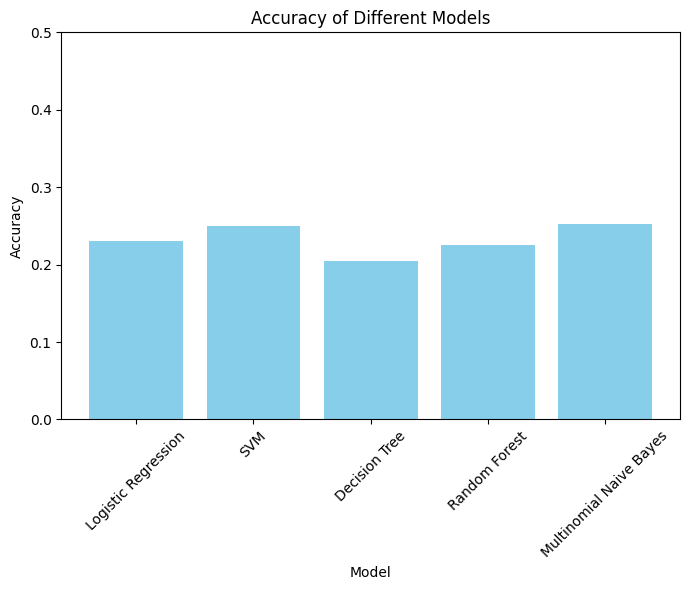

In [ ]:
import matplotlib.pyplot as plt
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Multinomial Naive Bayes": MultinomialNB(alpha=2)
}

accuracies = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    X_test_transformed = vectorizer.transform(X_test)
    y_pred = model.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


plt.figure(figsize=(7, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
